# Моделирование вкладов физических лиц
## Ведение
Цель: построить и описать модель, где целевой переменной (таргетом) являются помесячные изменения объемов рынка вкладов физических лиц РФ в рублях, которая будет объяснима с точки зрения экономической логики. Дополнительно требуется построить прогноз таргета на 01.2017 – 12.2017.
## План работы:
- Загрузка данных,
- Исследовательский анализ данных
- Построение моделей
- Тестирование модели
- Отчет

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,  make_scorer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
import lightgbm as lgb
from sklearn.compose import ColumnTransformer
pd.set_option('display.max_rows', None)

In [2]:
try:
    data = pd.read_excel(r"C:\Users\iyaro\OneDrive\Документы\-\Проект временные ряды\data\BST_DataSet.xlsx", index_col='Unnamed: 0')
except:
    data = pd.read_excel('data/BST_DataSet.xlsx', index_col='Unnamed: 0')
data

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
2011-01-01,-79049.0,5.244667,7.75,2.90,4.50,96.29,106.171510,5062.700000,20011.900000,30.08,20669
2011-02-01,180475.0,5.144211,8.00,3.10,4.40,103.96,106.999640,4830.700000,19307.700000,29.29,20680
2011-03-01,106845.0,5.021364,8.00,3.10,4.20,114.44,107.663040,4898.000000,19536.700000,28.43,22673
2011-04-01,224890.0,4.558571,8.00,2.60,4.10,123.15,108.125990,4918.200000,19788.700000,28.10,22519
2011-05-01,45856.0,4.795000,8.25,2.60,4.10,114.46,108.645000,5071.300000,20020.800000,27.87,22779
2011-06-01,227020.0,4.934762,8.25,2.60,4.20,113.76,108.894880,5079.800000,20160.900000,27.98,24137
2011-07-01,133756.0,4.777619,8.25,2.60,4.00,116.46,108.883990,5192.200000,20721.900000,27.90,23598
2011-08-01,10165.0,5.215217,8.25,2.60,4.10,110.08,108.622670,5306.600000,20828.100000,28.77,23051
2011-09-01,45398.0,5.873636,8.25,2.50,4.00,110.88,108.579220,5343.000000,21061.900000,30.49,23468
2011-10-01,17145.0,6.443810,8.25,2.90,4.50,109.47,109.100400,5420.400000,21480.400000,31.35,23602


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2011-01-01 to 2017-12-01
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Прирост вкладов физических лиц в рублях (млн руб)  72 non-null     float64
 1   Доходность ОФЗ по сроку до 1 года                  84 non-null     float64
 2   Ключевая ставка                                    84 non-null     float64
 3   Ставка по вкладам в долларах до 1 года             84 non-null     float64
 4   Ставка по вкладам в рублях до 1 года               84 non-null     float64
 5   Нефть марки Юралс, долл./барр                      84 non-null     float64
 6   Индекс потребительских цен, ед.                    84 non-null     float64
 7   М0, млрд руб                                       84 non-null     float64
 8   М2, млрд руб                                       84 non-null     float

In [4]:
data.columns

Index(['Прирост вкладов физических лиц в рублях (млн руб)',
       'Доходность ОФЗ по сроку до 1 года', 'Ключевая ставка',
       'Ставка по вкладам в долларах до 1 года',
       'Ставка по вкладам в рублях до 1 года', 'Нефть марки Юралс, долл./барр',
       'Индекс потребительских цен, ед.', 'М0, млрд руб', 'М2, млрд руб',
       'Курс доллара к рублю, руб', 'Номинальная средняя з/п, руб'],
      dtype='object')

In [5]:
data['Прирост вкладов физических лиц в рублях (млрд руб)'] = data['Прирост вкладов физических лиц в рублях (млн руб)'] / 1000 

In [6]:
data.columns = ['Прирост вкладов физических лиц в рублях (млн руб)',
       'Доходность ОФЗ по сроку до 1 года', 'Ключевая ставка',
       'Ставка по вкладам в долларах до 1 года',
       'Ставка по вкладам в рублях до 1 года', 'Нефть марки Юралс, долл./барр',
       'Индекс потребительских цен, ед.', 'М0, млрд руб', 'М2, млрд руб',
       'Курс доллара к рублю, руб', 'Номинальная средняя з/п, руб',
       'Прирост вкладов физических лиц в рублях (млрд руб)']

Отделю от общего фрейма данные, которые нужно спрогнозировать.

In [7]:
train = data.dropna()
train.tail(10)

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",Прирост вкладов физических лиц в рублях (млрд руб)
2016-03-01,147971.0,9.505909,11.0,1.59,7.46,39.07,160.21067,7149.795460,34309.649661,70.47,35501,147.971
2016-04-01,379759.0,9.701905,11.0,1.30,7.67,42.25,160.91559,7142.892260,34689.448390,66.68,36497,379.759
2016-05-01,131129.0,9.538947,11.0,1.19,7.04,47.13,161.57535,7301.487971,35105.469375,65.66,37270,131.129
2016-06-01,260591.0,9.752857,10.5,0.97,6.92,48.48,162.15702,7296.764604,35642.933649,65.31,38447,260.591
2016-07-01,98589.0,9.606667,10.5,0.87,6.78,45.07,163.03267,7372.703720,35856.891826,64.33,35888,98.589
2016-08-01,92168.0,9.274348,10.5,0.89,6.77,46.14,163.04897,7462.394809,36031.670782,64.92,35405,92.168
2016-09-01,20272.0,9.015000,10.0,0.82,6.00,46.19,163.32615,7438.479529,36169.577926,64.60,35843,20.272
2016-10-01,72037.0,9.002381,10.0,0.71,6.01,49.73,164.02846,7412.196989,36148.750479,62.68,35749,72.037
2016-11-01,172323.0,8.936190,10.0,0.72,6.62,46.44,164.75018,7339.148803,36051.043468,64.36,36195,172.323
2016-12-01,889085.0,8.659545,10.0,0.76,6.50,54.07,165.40918,7317.233222,36432.971673,62.18,47554,889.085


In [8]:
data_test = data[data['Прирост вкладов физических лиц в рублях (млн руб)'].isnull()]
data_test

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",Прирост вкладов физических лиц в рублях (млрд руб)
2017-01-01,NaN,8.416190,10.00,0.79,6.50,54.89,166.434720,7714.777071,38417.973904,59.96,34422,NaN
2017-02-01,NaN,8.830526,10.00,0.77,6.30,55.49,166.800870,7543.682136,38016.827597,58.39,35497,NaN
2017-03-01,NaN,8.987727,9.75,0.80,5.91,51.97,167.017720,7587.379089,38462.292674,58.10,37899,NaN
2017-04-01,NaN,8.655263,9.75,0.52,6.25,53.06,167.568870,7610.346801,38555.203677,56.43,39225,NaN
2017-05-01,NaN,8.319500,9.25,0.76,6.10,50.87,168.188880,7775.286453,38663.774533,57.17,39679,NaN
2017-06-01,NaN,8.039048,9.00,0.71,5.70,46.89,169.214830,7813.342742,39222.853872,57.82,41454,NaN
2017-07-01,NaN,8.074286,9.00,0.66,6.07,48.50,169.333280,7946.920837,39623.111354,59.67,38073,NaN
2017-08-01,NaN,7.882174,9.00,0.73,6.07,52.00,168.418880,8034.188296,39275.911028,59.65,37099,NaN
2017-09-01,NaN,7.648095,8.50,0.66,5.31,57.00,168.166250,8066.772110,39419.314228,57.73,38047,NaN
2017-10-01,NaN,7.503636,8.25,0.61,5.67,57.50,168.502590,8089.527215,39570.988535,57.71,38333,NaN


Отлично, дальше посмотрю на данные чуть подробнее, рассмотрим тренд и сезонность

## Исследовательский анализ данных

In [9]:
def plot(x, m):
    decomposed = seasonal_decompose(x, model='additive')

    plt.figure(figsize=(6, 8))
    plt.subplot(311)
    decomposed.trend.plot(ax=plt.gca())
    plt.title('Тренд ' +  m)
    plt.subplot(312)
    decomposed.seasonal['2013-01-1':'2016-12-01'].plot(ax=plt.gca())
    plt.title('Сезонность ' + m)

    plt.tight_layout()
    
    plt.figure(figsize=(2, 4))
   
    sns.boxplot(data=x)
    plt.title('Boxplot для ' + m)
    
    print(x.describe())

In [10]:
def plot_small(x, m):
    decomposed = seasonal_decompose(x, model='additive')

    plt.figure(figsize=(6, 8))
    plt.subplot(311)
    decomposed.trend.plot(ax=plt.gca())
    plt.title('Тренд ' +  m)
    
    plt.tight_layout()
    
    plt.figure(figsize=(2, 4))
   
    sns.boxplot(data=x)
    plt.title('Boxplot для ' + m)
    
    print(x.describe())

count      72.000000
mean      146.640500
std       259.385694
min      -567.448000
25%        19.490250
50%       112.924500
75%       236.052750
max      1034.556000
Name: Прирост вкладов физических лиц в рублях (млрд руб), dtype: float64


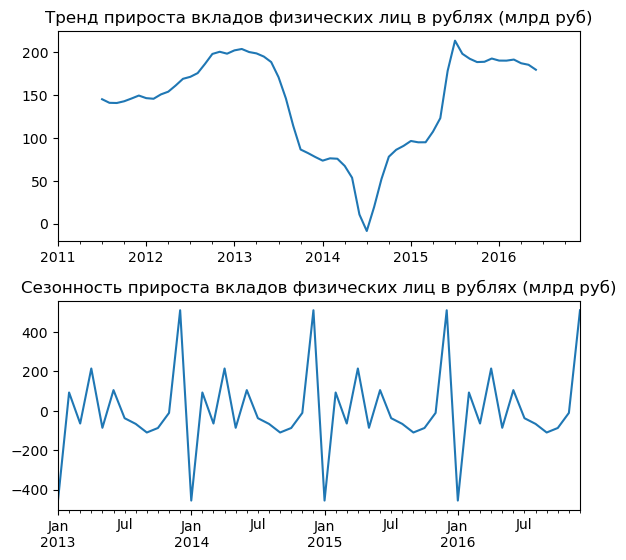

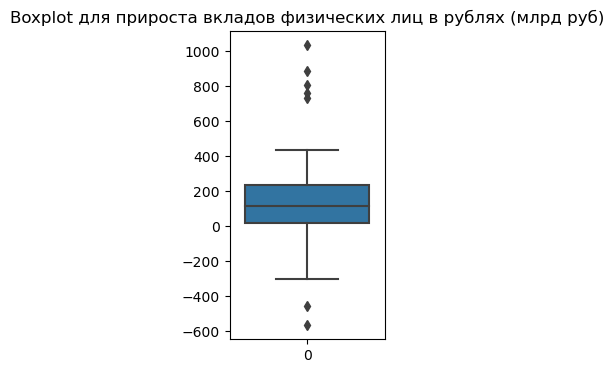

In [11]:
plot(train['Прирост вкладов физических лиц в рублях (млрд руб)'], 'прироста вкладов физических лиц в рублях (млрд руб)')

In [12]:
january_data = data[data.index.month == 1]
january_data

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",Прирост вкладов физических лиц в рублях (млрд руб)
2011-01-01,-79049.0,5.244667,7.75,2.90,4.50,96.29,106.17151,5062.700000,20011.900000,30.08,20669,-79.049
2012-01-01,-168795.0,6.411905,8.00,3.10,5.80,110.99,110.59088,5938.600000,24204.800000,31.51,23746,-168.795
2013-01-01,-187311.0,5.956111,8.25,2.60,6.10,112.93,118.41415,6430.100000,27164.600000,30.26,26840,-187.311
2014-01-01,-567448.0,6.183684,5.50,2.01,5.30,107.57,125.57770,6985.600000,31155.600000,33.46,29535,-567.448
2015-01-01,-187272.0,15.098421,17.00,5.22,12.33,48.42,144.37852,7171.469671,31615.718895,61.70,30929,-187.272
2016-01-01,-454791.0,10.308889,11.00,1.58,8.20,30.80,158.47866,7239.145905,35179.714815,76.25,32660,-454.791
2017-01-01,NaN,8.416190,10.00,0.79,6.50,54.89,166.43472,7714.777071,38417.973904,59.96,34422,NaN


С 2013 по середину 2014 года тренд нисходящий, затем произошел разворот тренда. В январе прирост всегда отрицательный. Большинстов значений нахоядятся в диапозоне от 20000 до 230000 млн рублей

count    84.000000
mean      7.875670
std       2.195040
min       4.558571
25%       6.228064
50%       7.475455
75%       9.332238
max      15.098421
Name: Доходность ОФЗ по сроку до 1 года, dtype: float64


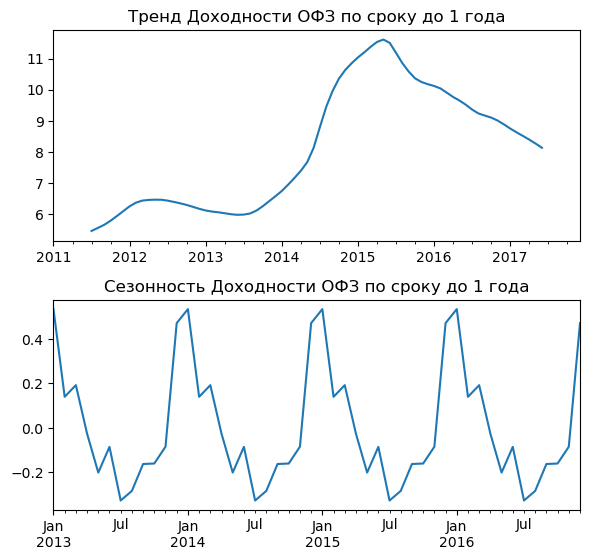

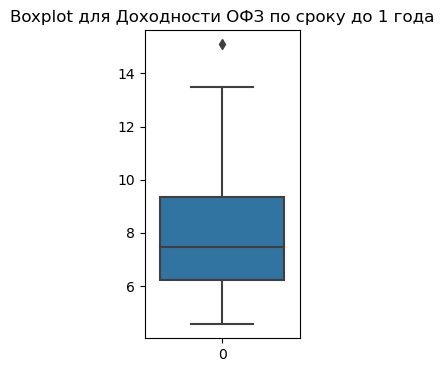

In [13]:
plot(data['Доходность ОФЗ по сроку до 1 года'], 'Доходности ОФЗ по сроку до 1 года')

In [14]:
jul_data = data[data.index.month == 7]
jul_data

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",Прирост вкладов физических лиц в рублях (млрд руб)
2011-07-01,133756.0,4.777619,8.25,2.60,4.00,116.46,108.88399,5192.200000,20721.900000,27.90,23598,133.756
2012-07-01,13565.0,6.519677,8.00,2.90,5.30,103.14,114.97117,6003.900000,24461.000000,32.50,26684,13.565
2013-07-01,78270.0,5.999565,8.25,2.60,5.40,107.72,122.38722,6470.300000,28212.300000,32.74,30229,78.270
2014-07-01,96407.0,8.294783,8.00,1.58,5.54,106.98,131.50397,6762.198000,30071.800000,34.64,32515,96.407
2015-07-01,185049.0,10.199130,11.50,2.20,8.74,55.87,152.07483,6659.495603,31936.293528,57.07,33901,185.049
2016-07-01,98589.0,9.606667,10.50,0.87,6.78,45.07,163.03267,7372.703720,35856.891826,64.33,35888,98.589
2017-07-01,NaN,8.074286,9.00,0.66,6.07,48.50,169.33328,7946.920837,39623.111354,59.67,38073,NaN


Заметен резкий рост доходности ОФЗ с середины 2013 до начала 2015 года, затем тренд сменился на нисходящий. В июле самая маленькая доходность, а значения в среднем распределены от 6 до 9.5.

count    84.000000
mean      9.130952
std       2.214233
min       5.500000
25%       8.000000
50%       8.250000
75%      10.125000
max      17.000000
Name: Ключевая ставка, dtype: float64


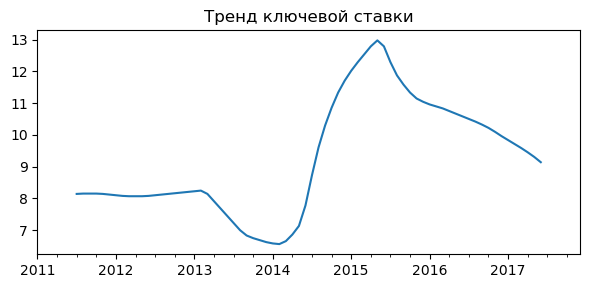

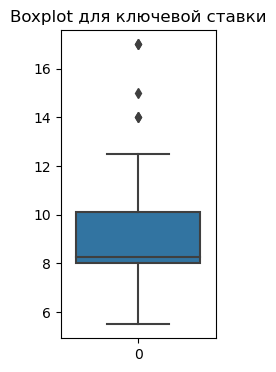

In [15]:
plot_small(data['Ключевая ставка'], 'ключевой ставки')

In [16]:
data[data['Ключевая ставка'] > 16]

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",Прирост вкладов физических лиц в рублях (млрд руб)
2014-12-01,-77472.0,13.480455,17.0,5.22,12.29,62.16,139.02602,6920.000000,30141.900000,55.41,42136,-77.472
2015-01-01,-187272.0,15.098421,17.0,5.22,12.33,48.42,144.37852,7171.469671,31615.718895,61.70,30929,-187.272


Заметен резкий рост ключевой ставки с 2014 по 2015, потом ставка плавно снижалась. С сентября 2013 по февраль 2014 была минимальная ключевая ставка 5.5%, а максимальная ставка 17% была уже к концу 2014 года.

count    84.000000
mean      2.184643
std       1.108624
min       0.520000
25%       1.510000
50%       2.230000
75%       2.900000
max       5.220000
Name: Ставка по вкладам в долларах до 1 года, dtype: float64


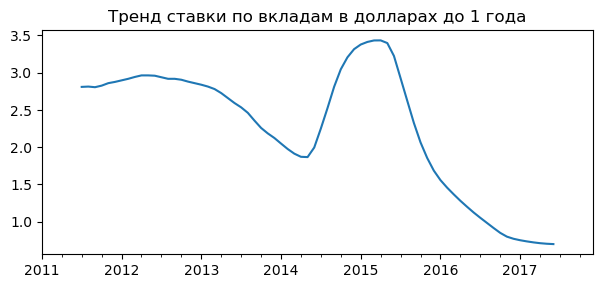

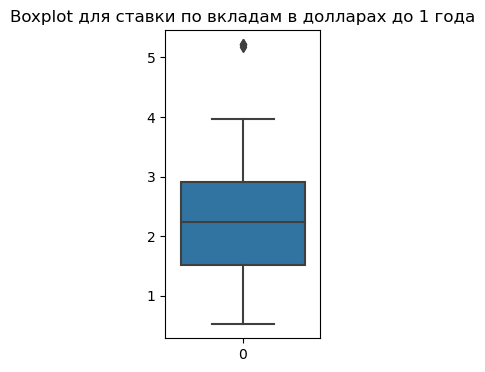

In [17]:
plot_small(data['Ставка по вкладам в долларах до 1 года'], 'cтавки по вкладам в долларах до 1 года')

C 2014 по 2015 ставка по вкладам в долларах росла, однако потом тренд сменился на отрицательный и ставка стала меньше 1%. Максимальная ставка в долларах была в декабре 2014 и январе 2015 года

count    84.000000
mean      6.233929
std       1.733394
min       4.000000
25%       5.292500
50%       5.755000
75%       6.657500
max      12.330000
Name: Ставка по вкладам в рублях до 1 года, dtype: float64


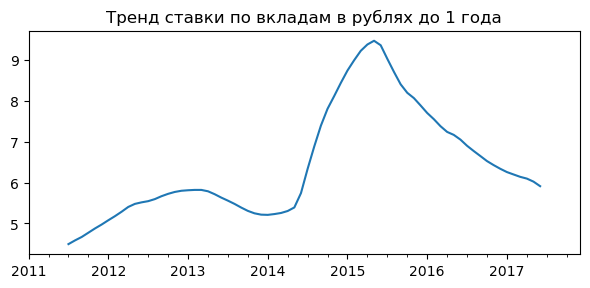

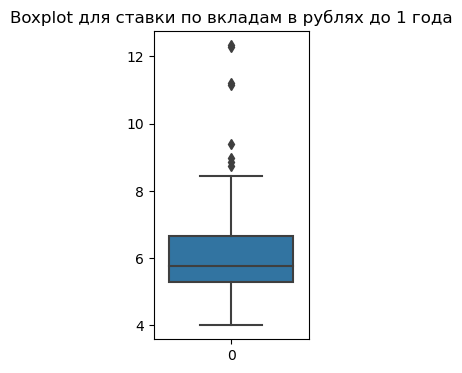

In [18]:
plot_small(data['Ставка по вкладам в рублях до 1 года'], 'cтавки по вкладам в рублях до 1 года')

In [19]:
data[data.index.year == 2015]

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",Прирост вкладов физических лиц в рублях (млрд руб)
2015-01-01,-187272.0,15.098421,17.0,5.22,12.33,48.42,144.37852,7171.469671,31615.718895,61.70,30929,-187.272
2015-02-01,369176.0,13.113158,15.0,5.20,11.22,57.93,147.58372,6700.271863,31033.717927,64.63,31325,369.176
2015-03-01,186618.0,12.795238,14.0,5.18,11.16,55.79,149.36949,6671.922719,31224.976954,60.23,32642,186.618
2015-04-01,434065.0,11.627273,14.0,3.96,8.97,59.39,150.05659,6540.855310,31028.841248,52.87,34377,434.065
2015-05-01,68827.0,10.427222,12.5,3.54,8.86,64.56,150.58179,6619.609393,31696.853516,50.58,34380,68.827
2015-06-01,231858.0,10.560476,11.5,2.70,9.39,62.35,150.86789,6576.751959,31820.377925,54.50,35395,231.858
2015-07-01,185049.0,10.199130,11.5,2.20,8.74,55.87,152.07483,6659.495603,31936.293528,57.07,33901,185.049
2015-08-01,7104.0,10.564762,11.0,1.98,8.44,46.99,152.60710,6759.526311,32072.487389,65.15,32176,7.104
2015-09-01,75169.0,10.977727,11.0,1.90,8.45,47.23,153.47696,6785.730349,32361.002536,66.77,32911,75.169
2015-10-01,120663.0,10.390909,11.0,1.70,6.92,48.12,154.61269,6744.854183,32052.488150,63.07,33357,120.663


Минимальное значение ставки по вкладам в рублях было в июле 2011 года, Резкий скачок в период с 2014 до 2015. Пик ставки в январе 2015. 12,29%. Затем произошел отрицательный рост. Минимальное значение зафиксировано в 2011, там ставка колебалась от 4 до 4.5. В ноябре ставка повысилась до 5.5

count     84.000000
mean      83.118095
std       30.069987
min       30.800000
25%       51.992500
50%       99.630000
75%      110.185000
max      124.930000
Name: Нефть марки Юралс, долл./барр, dtype: float64


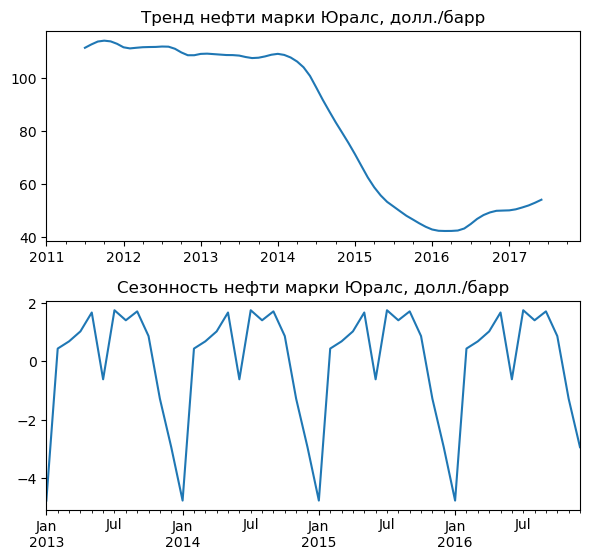

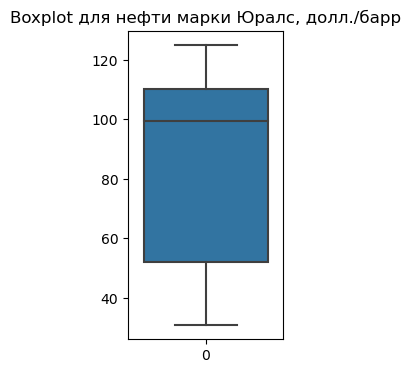

In [20]:
plot(data['Нефть марки Юралс, долл./барр'], 'нефти марки Юралс, долл./барр')

Стоимость барреля нефти относительно доллара упала более чем в 2 раза в период с 2014 по 2016. Рубль тогда тоже ослаб. с 2016 по 2017 замечен новый тренд восстановления барреля. До пиковых значений далеко. Минимум замечен в январе 2016 и составил 30.80, а пик в марте 2012 - 125 долларов.

count     84.000000
mean     136.725747
std       22.413867
min      106.171510
25%      116.118345
50%      131.183355
75%      160.386900
max      169.560950
Name: Индекс потребительских цен, ед., dtype: float64


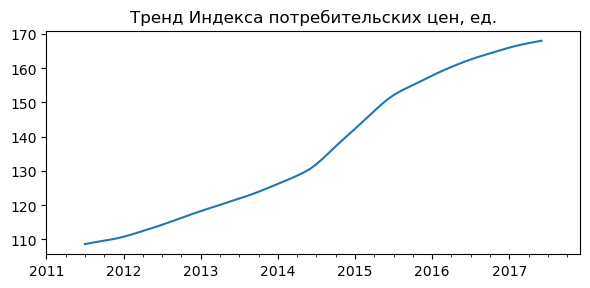

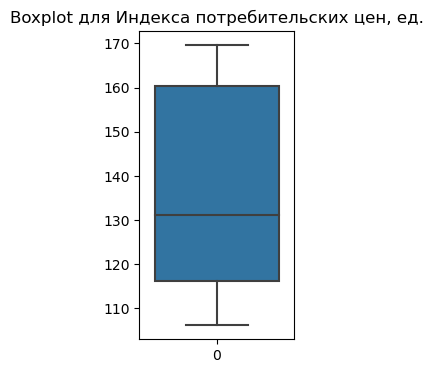

In [21]:
plot_small(data['Индекс потребительских цен, ед.'], 'Индекса потребительских цен, ед.')

Хоть где-то наша экономика стабильна, индекс потребительских цен растет без остановки. Минимум в январе 2011, максимум в декабре 2017 года.

count      84.000000
mean     6589.289050
std       844.915477
min      4830.700000
25%      5976.075000
50%      6667.511360
75%      7188.388730
max      8089.527215
Name: М0, млрд руб, dtype: float64


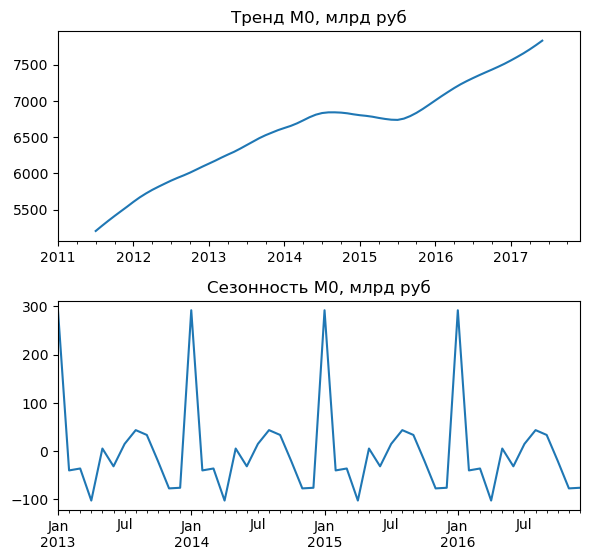

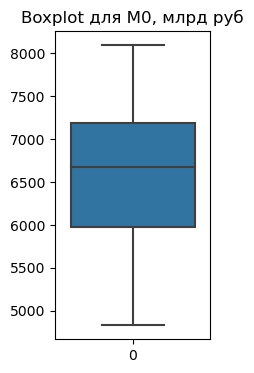

In [22]:
plot(data['М0, млрд руб'], 'М0, млрд руб')

In [23]:
data

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",Прирост вкладов физических лиц в рублях (млрд руб)
2011-01-01,-79049.0,5.244667,7.75,2.90,4.50,96.29,106.171510,5062.700000,20011.900000,30.08,20669,-79.049
2011-02-01,180475.0,5.144211,8.00,3.10,4.40,103.96,106.999640,4830.700000,19307.700000,29.29,20680,180.475
2011-03-01,106845.0,5.021364,8.00,3.10,4.20,114.44,107.663040,4898.000000,19536.700000,28.43,22673,106.845
2011-04-01,224890.0,4.558571,8.00,2.60,4.10,123.15,108.125990,4918.200000,19788.700000,28.10,22519,224.890
2011-05-01,45856.0,4.795000,8.25,2.60,4.10,114.46,108.645000,5071.300000,20020.800000,27.87,22779,45.856
2011-06-01,227020.0,4.934762,8.25,2.60,4.20,113.76,108.894880,5079.800000,20160.900000,27.98,24137,227.020
2011-07-01,133756.0,4.777619,8.25,2.60,4.00,116.46,108.883990,5192.200000,20721.900000,27.90,23598,133.756
2011-08-01,10165.0,5.215217,8.25,2.60,4.10,110.08,108.622670,5306.600000,20828.100000,28.77,23051,10.165
2011-09-01,45398.0,5.873636,8.25,2.50,4.00,110.88,108.579220,5343.000000,21061.900000,30.49,23468,45.398
2011-10-01,17145.0,6.443810,8.25,2.90,4.50,109.47,109.100400,5420.400000,21480.400000,31.35,23602,17.145


Тренд M0 по прежнему восходящий, в январе М0 обычно выше, чем в другие месяцы этого года.

count       84.000000
mean     29838.955891
std       5984.722501
min      19307.700000
25%      24443.050000
50%      30106.850000
75%      34793.453636
max      40114.408278
Name: М2, млрд руб, dtype: float64


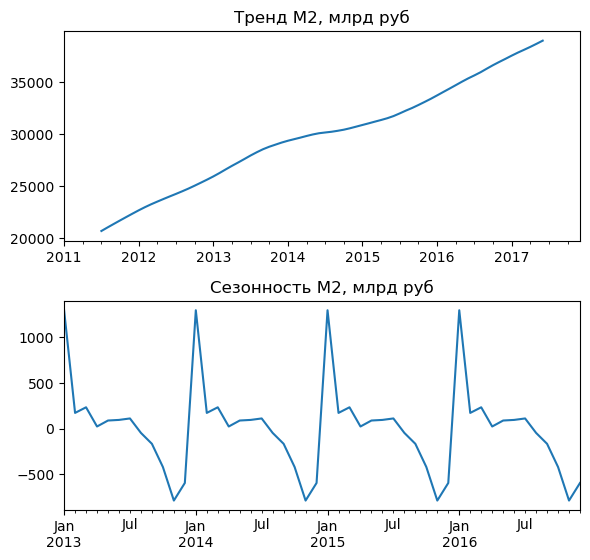

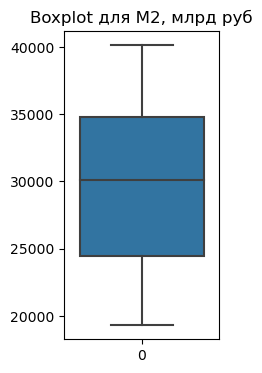

In [24]:
plot(data['М2, млрд руб'], 'М2, млрд руб')

Аналогично с M0, растет обращение наличных денег и сумма вкладов.

count    84.000000
mean     45.288690
std      15.539177
min      27.870000
25%      31.345000
50%      35.885000
75%      59.742500
max      77.220000
Name: Курс доллара к рублю, руб, dtype: float64


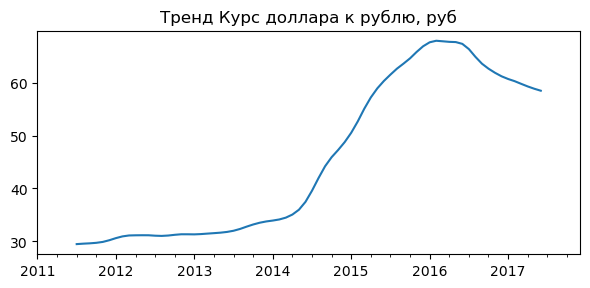

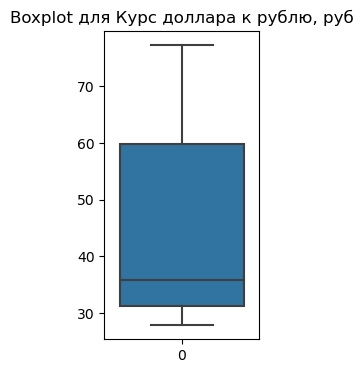

In [25]:
plot_small(data['Курс доллара к рублю, руб'], 'Курс доллара к рублю, руб')

Из-за политической ситуации в 2014 году доллар по отношению к рублю вырос более чем в 2 раза и закрепился выше 60ти рублей.

count       84.000000
mean     31877.130952
std       6029.179510
min      20669.000000
25%      26830.750000
50%      32355.500000
75%      35772.500000
max      50500.000000
Name: Номинальная средняя з/п, руб, dtype: float64


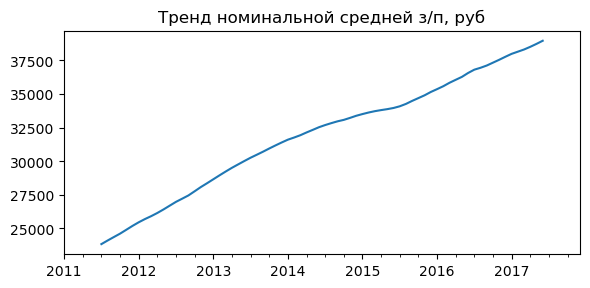

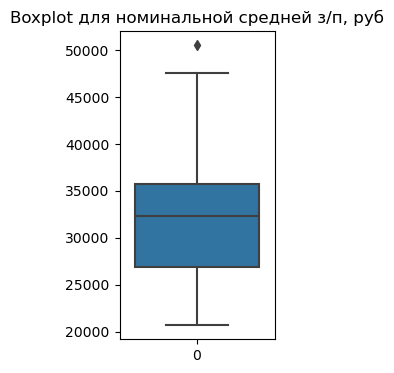

In [26]:
plot_small(data['Номинальная средняя з/п, руб'], 'номинальной средней з/п, руб')

In [27]:
data

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",Прирост вкладов физических лиц в рублях (млрд руб)
2011-01-01,-79049.0,5.244667,7.75,2.90,4.50,96.29,106.171510,5062.700000,20011.900000,30.08,20669,-79.049
2011-02-01,180475.0,5.144211,8.00,3.10,4.40,103.96,106.999640,4830.700000,19307.700000,29.29,20680,180.475
2011-03-01,106845.0,5.021364,8.00,3.10,4.20,114.44,107.663040,4898.000000,19536.700000,28.43,22673,106.845
2011-04-01,224890.0,4.558571,8.00,2.60,4.10,123.15,108.125990,4918.200000,19788.700000,28.10,22519,224.890
2011-05-01,45856.0,4.795000,8.25,2.60,4.10,114.46,108.645000,5071.300000,20020.800000,27.87,22779,45.856
2011-06-01,227020.0,4.934762,8.25,2.60,4.20,113.76,108.894880,5079.800000,20160.900000,27.98,24137,227.020
2011-07-01,133756.0,4.777619,8.25,2.60,4.00,116.46,108.883990,5192.200000,20721.900000,27.90,23598,133.756
2011-08-01,10165.0,5.215217,8.25,2.60,4.10,110.08,108.622670,5306.600000,20828.100000,28.77,23051,10.165
2011-09-01,45398.0,5.873636,8.25,2.50,4.00,110.88,108.579220,5343.000000,21061.900000,30.49,23468,45.398
2011-10-01,17145.0,6.443810,8.25,2.90,4.50,109.47,109.100400,5420.400000,21480.400000,31.35,23602,17.145


Вместе с ценами растет и зарплата

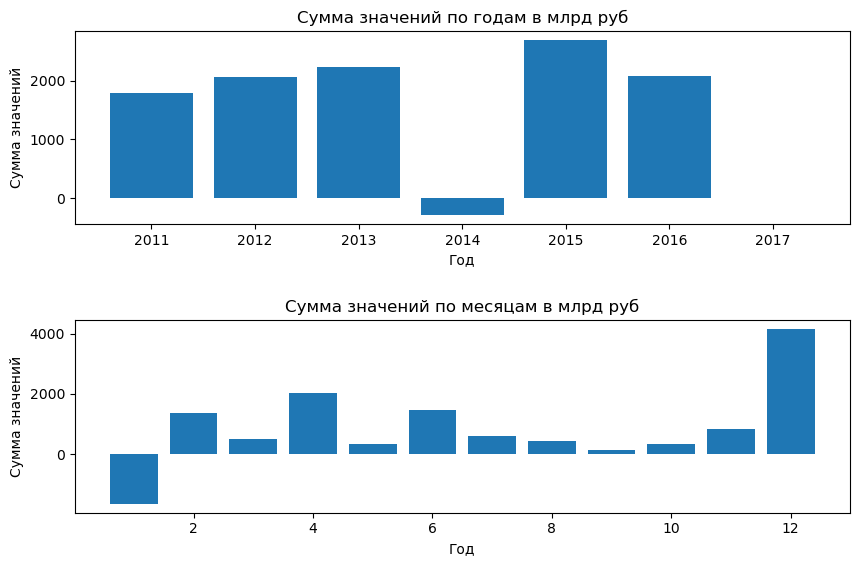

In [28]:
year = data.groupby(data.index.year)['Прирост вкладов физических лиц в рублях (млн руб)'].sum()
month = data.groupby(data.index.month)['Прирост вкладов физических лиц в рублях (млн руб)'].sum()
plt.figure(figsize=[10,10])
plt.subplots_adjust(hspace=0.5) 

plt.subplot(311)
plt.bar(year.index, year.values/1000)
plt.xlabel("Год")
plt.ylabel("Сумма значений")
plt.title("Сумма значений по годам в млрд руб")

plt.subplot(312)
plt.bar(month.index, month.values/1000)
plt.xlabel("Год")
plt.ylabel("Сумма значений")
plt.title("Сумма значений по месяцам в млрд руб")

plt.show()

Видим отрицательный прирост в 2014 году, вероятно это связано с политической ситуацией. В остальные года прирост около 2000 млрд рублей. Также стоит заметить, что декабрь самый позитивный месяц, а в январе прирост отрицательный.

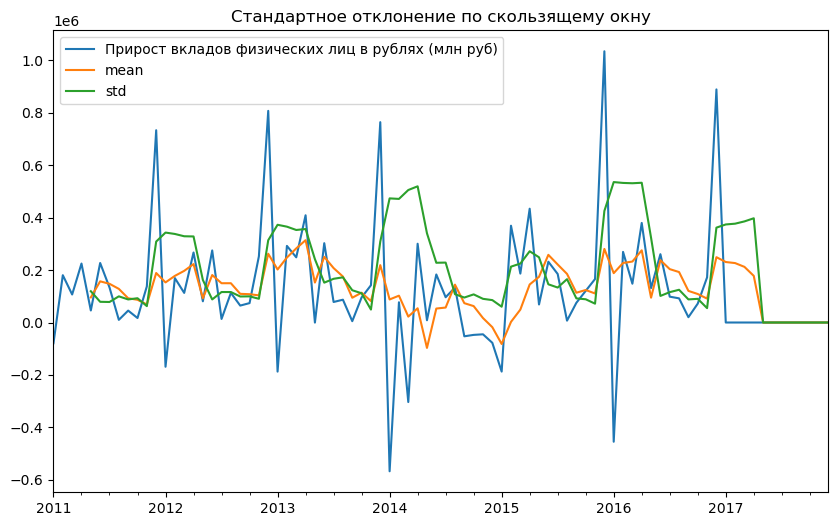

In [29]:
df = data['2011':'2017'].resample('1M').sum()


target_col = 'Прирост вкладов физических лиц в рублях (млн руб)'
df['mean'] = df[target_col].rolling(5).mean()
df['std'] = df[target_col].rolling(5).std()


df.plot(y=[target_col, 'mean', 'std'], figsize=(10, 6))
plt.title('Cтандартное отклонение по скользящему окну')
plt.show()

Данных начиная с 2017 года нет, их предстоит предсказать, поэтому там нулевые значения.

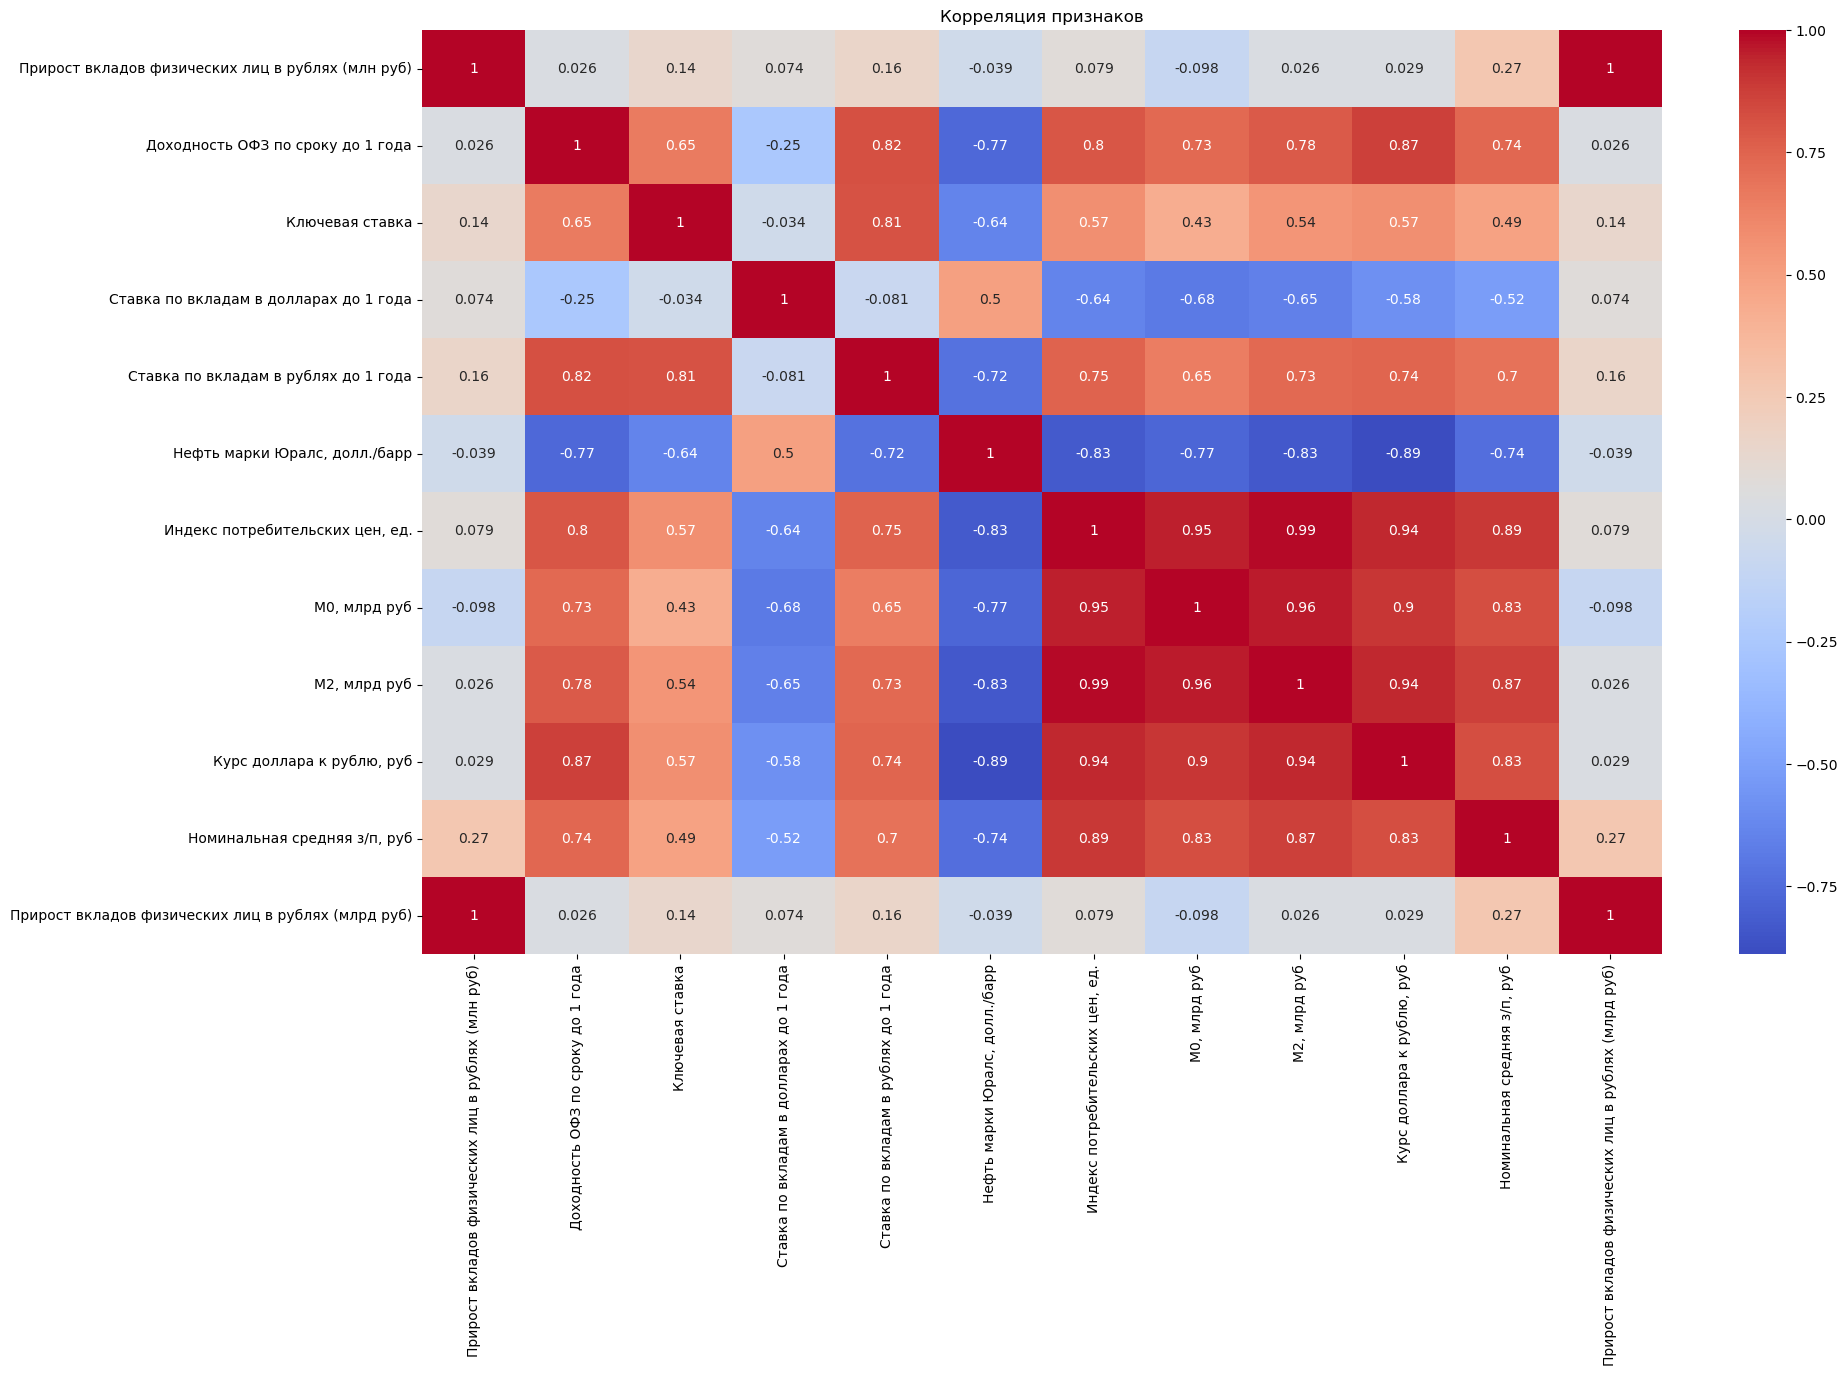

In [30]:
plt.figure(figsize=(20, 12))
plt.title('Корреляция признаков')
sns.heatmap(train.corr(method='spearman'), annot = True, cmap="coolwarm")
plt.show()

 Надо избавиться от мультикорреляции

In [31]:
data

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",Прирост вкладов физических лиц в рублях (млрд руб)
2011-01-01,-79049.0,5.244667,7.75,2.90,4.50,96.29,106.171510,5062.700000,20011.900000,30.08,20669,-79.049
2011-02-01,180475.0,5.144211,8.00,3.10,4.40,103.96,106.999640,4830.700000,19307.700000,29.29,20680,180.475
2011-03-01,106845.0,5.021364,8.00,3.10,4.20,114.44,107.663040,4898.000000,19536.700000,28.43,22673,106.845
2011-04-01,224890.0,4.558571,8.00,2.60,4.10,123.15,108.125990,4918.200000,19788.700000,28.10,22519,224.890
2011-05-01,45856.0,4.795000,8.25,2.60,4.10,114.46,108.645000,5071.300000,20020.800000,27.87,22779,45.856
2011-06-01,227020.0,4.934762,8.25,2.60,4.20,113.76,108.894880,5079.800000,20160.900000,27.98,24137,227.020
2011-07-01,133756.0,4.777619,8.25,2.60,4.00,116.46,108.883990,5192.200000,20721.900000,27.90,23598,133.756
2011-08-01,10165.0,5.215217,8.25,2.60,4.10,110.08,108.622670,5306.600000,20828.100000,28.77,23051,10.165
2011-09-01,45398.0,5.873636,8.25,2.50,4.00,110.88,108.579220,5343.000000,21061.900000,30.49,23468,45.398
2011-10-01,17145.0,6.443810,8.25,2.90,4.50,109.47,109.100400,5420.400000,21480.400000,31.35,23602,17.145


In [32]:
train = train.drop(['Прирост вкладов физических лиц в рублях (млрд руб)', 'М2, млрд руб',
                    'М0, млрд руб', 'Индекс потребительских цен, ед.'], axis=1)

In [33]:
data = data.drop(['Прирост вкладов физических лиц в рублях (млрд руб)', 'М2, млрд руб',
                  'М0, млрд руб', 'Индекс потребительских цен, ед.'], axis=1)

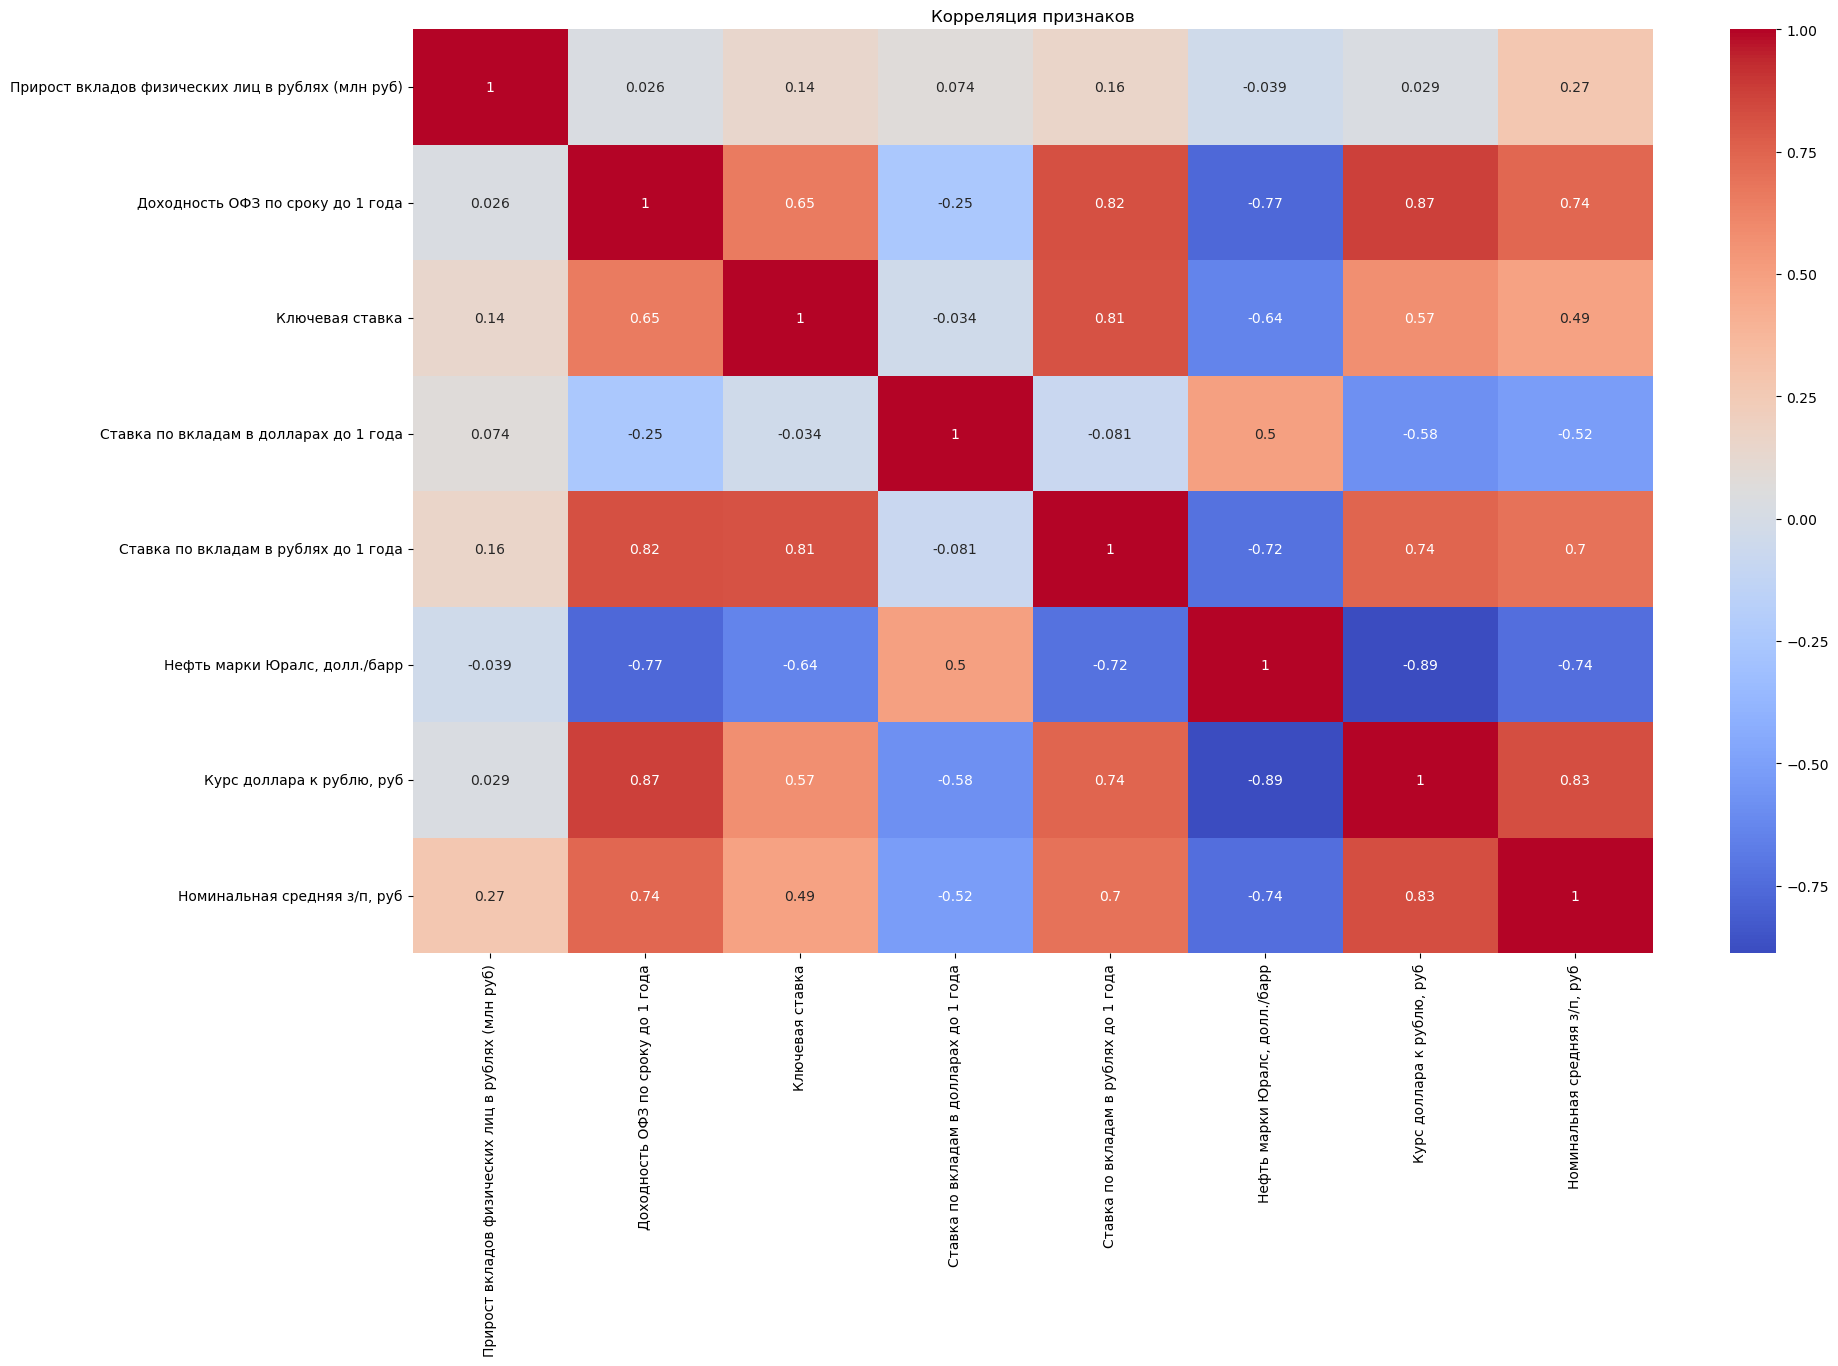

In [34]:
plt.figure(figsize=(20, 12))
plt.title('Корреляция признаков')
sns.heatmap(train.corr(method='spearman'), annot = True, cmap="coolwarm")
plt.show()

Добавим признаки и можно переходить к обучению.

In [35]:
def make_features(data, max_lag, rolling_mean_size):
 
    
   
    data['month'] = data.index.month
    data['year'] = data.index.year
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data[target_col].shift(lag)

    data['rolling_mean'] = data['Ставка по вкладам в долларах до 1 года'].shift().rolling(rolling_mean_size).mean()
    #data['rolling_mean_2'] = data['Ставка по вкладам в рублях до 1 года'].shift().rolling(rolling_mean_size).mean()
    #data['rolling_mean_3'] = data[target_col].shift().rolling(rolling_mean_size).mean()

make_features(data,24, 24)
data.head(20)

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",month,year,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
2011-01-01,-79049.0,5.244667,7.75,2.9,4.5,96.29,30.08,20669,1,2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-01,180475.0,5.144211,8.00,3.1,4.4,103.96,29.29,20680,2,2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-01,106845.0,5.021364,8.00,3.1,4.2,114.44,28.43,22673,3,2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-01,224890.0,4.558571,8.00,2.6,4.1,123.15,28.10,22519,4,2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-01,45856.0,4.795000,8.25,2.6,4.1,114.46,27.87,22779,5,2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-01,227020.0,4.934762,8.25,2.6,4.2,113.76,27.98,24137,6,2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,133756.0,4.777619,8.25,2.6,4.0,116.46,27.90,23598,7,2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10165.0,5.215217,8.25,2.6,4.1,110.08,28.77,23051,8,2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,45398.0,5.873636,8.25,2.5,4.0,110.88,30.49,23468,9,2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-01,17145.0,6.443810,8.25,2.9,4.5,109.47,31.35,23602,10,2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3ья скользящая хороший признак, однако не хвататет данных для прогнозирования, поэтому ее не возьму в признаки, а вторая скользящая сильно коррелирует с годом. Тоже не возьму в признаки.

In [36]:
data = data.fillna(0)

In [37]:
data

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",month,year,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
2011-01-01,-79049.0,5.244667,7.75,2.90,4.50,96.29,30.08,20669,1,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2011-02-01,180475.0,5.144211,8.00,3.10,4.40,103.96,29.29,20680,2,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2011-03-01,106845.0,5.021364,8.00,3.10,4.20,114.44,28.43,22673,3,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2011-04-01,224890.0,4.558571,8.00,2.60,4.10,123.15,28.10,22519,4,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2011-05-01,45856.0,4.795000,8.25,2.60,4.10,114.46,27.87,22779,5,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2011-06-01,227020.0,4.934762,8.25,2.60,4.20,113.76,27.98,24137,6,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2011-07-01,133756.0,4.777619,8.25,2.60,4.00,116.46,27.90,23598,7,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2011-08-01,10165.0,5.215217,8.25,2.60,4.10,110.08,28.77,23051,8,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2011-09-01,45398.0,5.873636,8.25,2.50,4.00,110.88,30.49,23468,9,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2011-10-01,17145.0,6.443810,8.25,2.90,4.50,109.47,31.35,23602,10,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


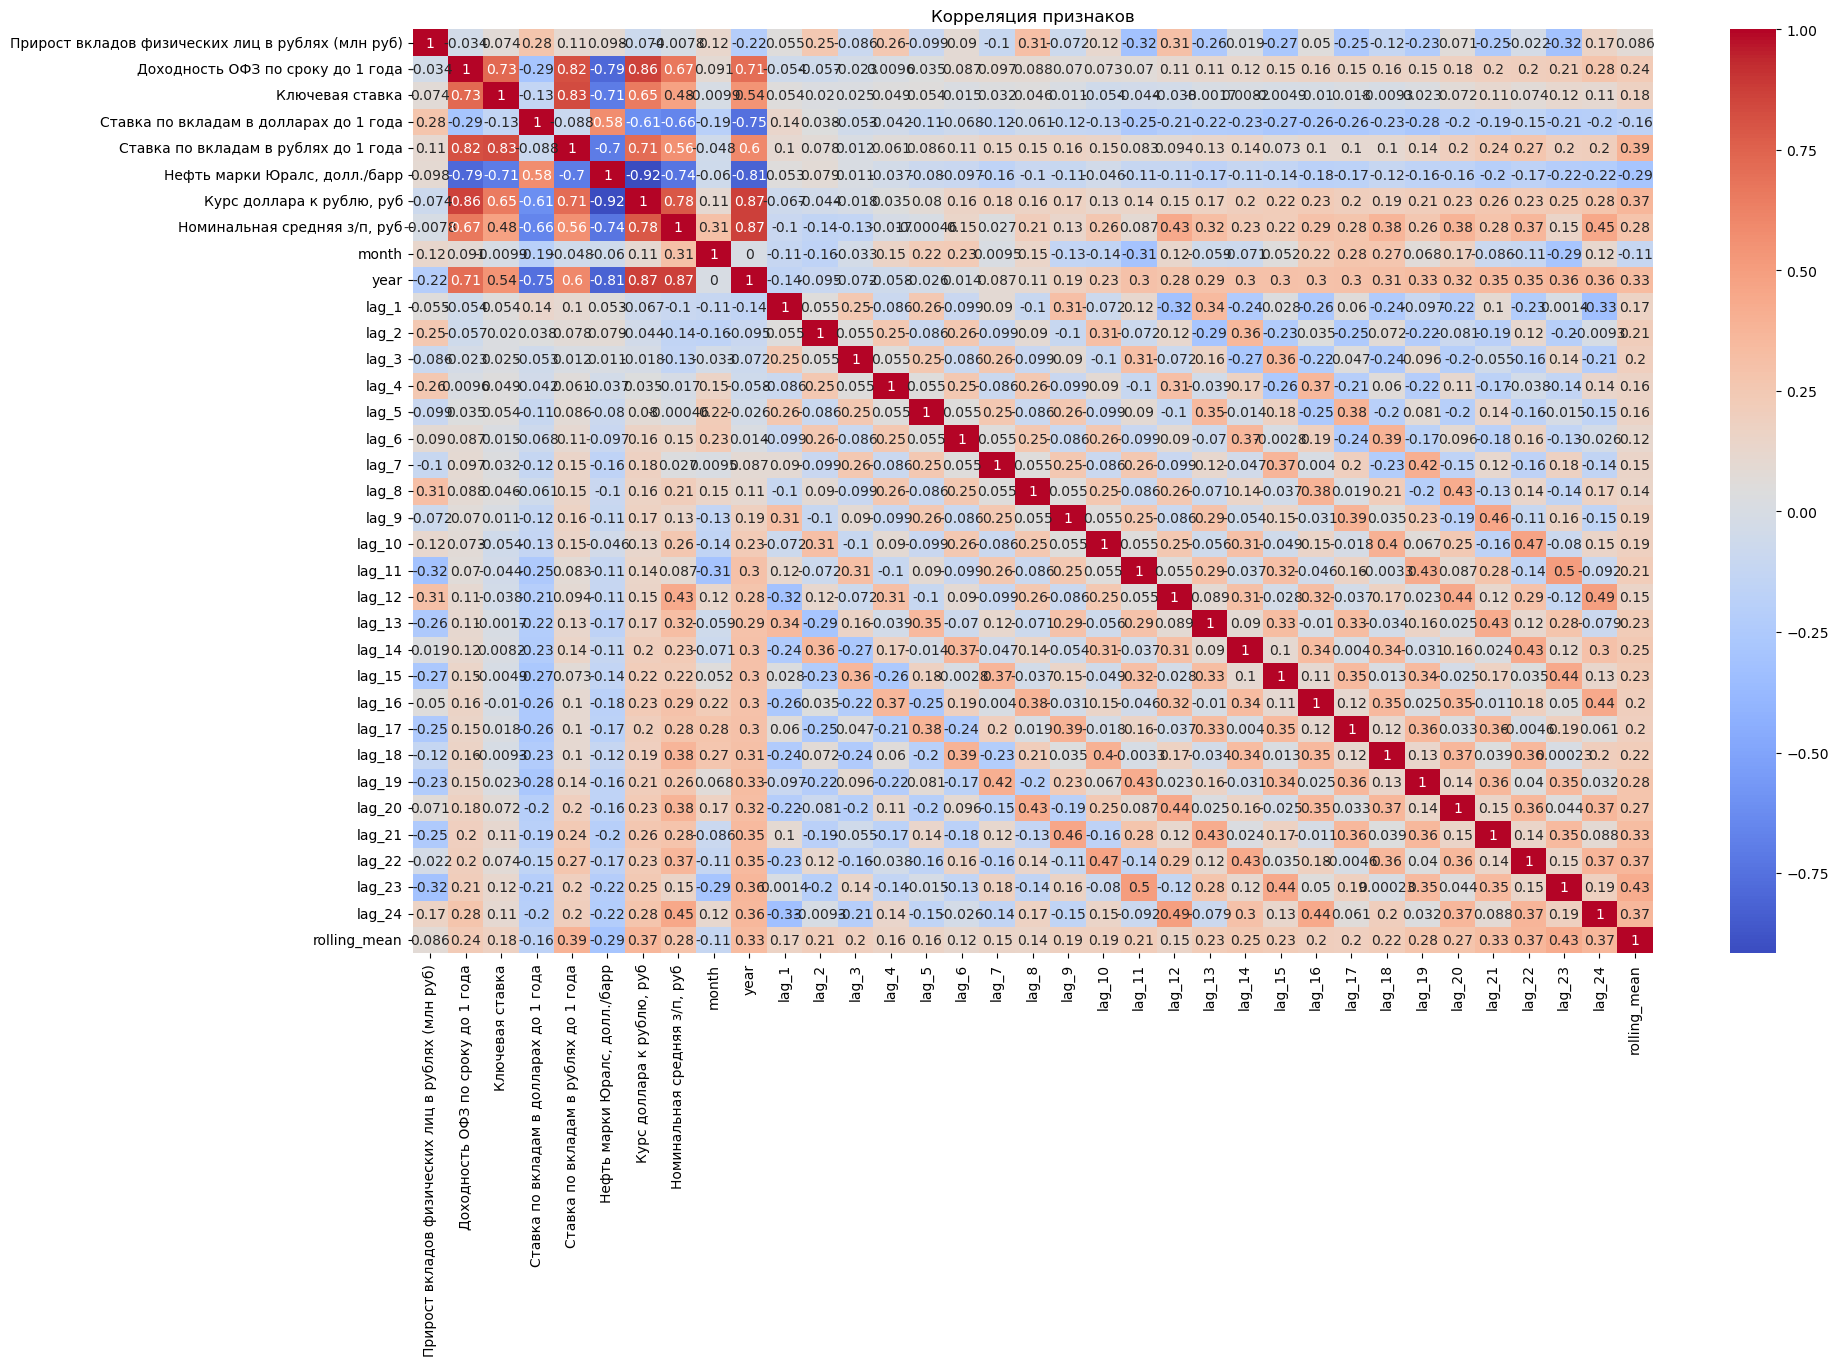

In [38]:
plt.figure(figsize=(20, 12))
plt.title('Корреляция признаков')
sns.heatmap(data.corr(method='spearman'), annot = True, cmap="coolwarm")
plt.show()

In [39]:
train = data[data['Прирост вкладов физических лиц в рублях (млн руб)']!=0]
x = train.drop('Прирост вкладов физических лиц в рублях (млн руб)', axis = 1)
y = train['Прирост вкладов физических лиц в рублях (млн руб)']
data_pred = data[data['Прирост вкладов физических лиц в рублях (млн руб)']==0]

In [40]:
data_pred

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",month,year,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
2017-01-01,0.0,8.416190,10.00,0.79,6.50,54.89,59.96,34422,1,2017,...,75169.0,7104.0,185049.0,231858.0,68827.0,434065.0,186618.0,369176.0,-187272.0,2.080417
2017-02-01,0.0,8.830526,10.00,0.77,6.30,55.49,58.39,35497,2,2017,...,120663.0,75169.0,7104.0,185049.0,231858.0,68827.0,434065.0,186618.0,369176.0,1.895833
2017-03-01,0.0,8.987727,9.75,0.80,5.91,51.97,58.10,37899,3,2017,...,165837.0,120663.0,75169.0,7104.0,185049.0,231858.0,68827.0,434065.0,186618.0,1.711250
2017-04-01,0.0,8.655263,9.75,0.52,6.25,53.06,56.43,39225,4,2017,...,1034556.0,165837.0,120663.0,75169.0,7104.0,185049.0,231858.0,68827.0,434065.0,1.528750
2017-05-01,0.0,8.319500,9.25,0.76,6.10,50.87,57.17,39679,5,2017,...,-454791.0,1034556.0,165837.0,120663.0,75169.0,7104.0,185049.0,231858.0,68827.0,1.385417
2017-06-01,0.0,8.039048,9.00,0.71,5.70,46.89,57.82,41454,6,2017,...,269297.0,-454791.0,1034556.0,165837.0,120663.0,75169.0,7104.0,185049.0,231858.0,1.269583
2017-07-01,0.0,8.074286,9.00,0.66,6.07,48.50,59.67,38073,7,2017,...,147971.0,269297.0,-454791.0,1034556.0,165837.0,120663.0,75169.0,7104.0,185049.0,1.186667
2017-08-01,0.0,7.882174,9.00,0.73,6.07,52.00,59.65,37099,8,2017,...,379759.0,147971.0,269297.0,-454791.0,1034556.0,165837.0,120663.0,75169.0,7104.0,1.122500
2017-09-01,0.0,7.648095,8.50,0.66,5.31,57.00,57.73,38047,9,2017,...,131129.0,379759.0,147971.0,269297.0,-454791.0,1034556.0,165837.0,120663.0,75169.0,1.070417
2017-10-01,0.0,7.503636,8.25,0.61,5.67,57.50,57.71,38333,10,2017,...,260591.0,131129.0,379759.0,147971.0,269297.0,-454791.0,1034556.0,165837.0,120663.0,1.018750


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=False, test_size=0.25)

In [42]:
rmse_scor = make_scorer(mean_squared_error, squared=False, greater_is_better=False)
tscv = TimeSeriesSplit(n_splits=5)

In [43]:
%%time
rmse_scor = make_scorer(mean_squared_error, squared=False, greater_is_better=False)

model_lgb = lgb.LGBMRegressor()

param_grid_lgb = {
    'model__boosting_type': ['gbdt', 'dart'],
    'model__num_leaves': np.arange(30, 151, 10),
    'model__learning_rate': np.arange(0.1, 0.51, 0.1),
    'model__n_estimators': np.arange(1, 101, 5)
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model_lgb)
])

random_grid_lgb = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid_lgb, scoring=rmse_scor, cv=tscv, n_iter=10, random_state=12345, verbose=2)
random_grid_lgb.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END model__boosting_type=gbdt, model__learning_rate=0.2, model__n_estimators=86, model__num_leaves=40; total time=   0.0s
[CV] END model__boosting_type=gbdt, model__learning_rate=0.2, model__n_estimators=86, model__num_leaves=40; total time=   0.0s
[CV] END model__boosting_type=gbdt, model__learning_rate=0.2, model__n_estimators=86, model__num_leaves=40; total time=   0.0s
[CV] END model__boosting_type=gbdt, model__learning_rate=0.2, model__n_estimators=86, model__num_leaves=40; total time=   0.0s
[CV] END model__boosting_type=gbdt, model__learning_rate=0.2, model__n_estimators=86, model__num_leaves=40; total time=   0.0s
[CV] END model__boosting_type=dart, model__learning_rate=0.4, model__n_estimators=36, model__num_leaves=90; total time=   0.0s
[CV] END model__boosting_type=dart, model__learning_rate=0.4, model__n_estimators=36, model__num_leaves=90; total time=   0.0s
[CV] END model__boosting_type=dart, model__learnin

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model', LGBMRegressor())]),
                   param_distributions={'model__boosting_type': ['gbdt',
                                                                 'dart'],
                                        'model__learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'model__n_estimators': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]),
                                        'model__num_leaves': array([ 30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150])},
                   random_state=12345,
                   scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
                   verbose=2)

In [44]:
print('Лучшиий RMSE: lgb', -random_grid_lgb.best_score_)
print('Лучшиие гипперпараметры: lgb', random_grid_lgb.best_params_)

Лучшиий RMSE: lgb 251399.4785325137
Лучшиие гипперпараметры: lgb {'model__num_leaves': 100, 'model__n_estimators': 36, 'model__learning_rate': 0.1, 'model__boosting_type': 'dart'}


In [45]:
print('Лучшиий RMSE: lgb', -random_grid_lgb.best_score_)
print('Лучшиие гипперпараметры: lgb', random_grid_lgb.best_params_)

Лучшиий RMSE: lgb 251399.4785325137
Лучшиие гипперпараметры: lgb {'model__num_leaves': 100, 'model__n_estimators': 36, 'model__learning_rate': 0.1, 'model__boosting_type': 'dart'}


In [46]:
%%time
model_forest = RandomForestRegressor(random_state=100723)


param_forest_grid = {
    'max_depth': [7, 8 ,9, 15, 18, 19],
    'n_estimators': [ 130, 150, 180, 220, 250]
}


pipeline_for = Pipeline([
    ('scaler', StandardScaler()),
    ('grid_search', RandomizedSearchCV(estimator=model_forest, param_distributions=param_forest_grid, cv=tscv, random_state=12345, verbose=2, scoring=rmse_scor))
])


pipeline_for.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................max_depth=19, n_estimators=150; total time=   0.0s
[CV] END .....................max_depth=19, n_estimators=150; total time=   0.0s
[CV] END .....................max_depth=19, n_estimators=150; total time=   0.1s
[CV] END .....................max_depth=19, n_estimators=150; total time=   0.1s
[CV] END .....................max_depth=19, n_estimators=150; total time=   0.1s
[CV] END ......................max_depth=9, n_estimators=180; total time=   0.1s
[CV] END ......................max_depth=9, n_estimators=180; total time=   0.2s
[CV] END ......................max_depth=9, n_estimators=180; total time=   0.1s
[CV] END ......................max_depth=9, n_estimators=180; total time=   0.1s
[CV] END ......................max_depth=9, n_estimators=180; total time=   0.2s
[CV] END .....................max_depth=15, n_estimators=220; total time=   0.1s
[CV] END .....................max_depth=15, n_es

Pipeline(steps=[('scaler', StandardScaler()),
                ('grid_search',
                 RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                                    estimator=RandomForestRegressor(random_state=100723),
                                    param_distributions={'max_depth': [7, 8, 9,
                                                                       15, 18,
                                                                       19],
                                                         'n_estimators': [130,
                                                                          150,
                                                                          180,
                                                                          220,
                                                                          250]},
                                    random_state=12345,
                                    scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
                                    verbose=2))])

In [47]:
print('Лучшиий RMSE cлучайный лес:', -pipeline_for.named_steps['grid_search'].best_score_)
print('Лучшиие гипперпараметры случайный лес:', pipeline_for.named_steps['grid_search'].best_params_)

Лучшиий RMSE cлучайный лес: 216176.05597379463
Лучшиие гипперпараметры случайный лес: {'n_estimators': 220, 'max_depth': 7}


In [48]:
%%time
param_dist = {}
pipeline_line = Pipeline([
    ('scaler', StandardScaler()),  
    ('regression', Ridge())  
])

random_search = RandomizedSearchCV(pipeline_line, param_distributions=param_dist, n_iter=3, scoring=rmse_scor, random_state=12345, cv=tscv)

random_search.fit(x_train, y_train)



print("RMSE логистичсеская регрессия", -random_search.best_score_)

RMSE логистичсеская регрессия 388600.4788955762
Wall time: 38.7 ms


C:\Users\iyaro\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [49]:
result = {'Модель': ['LGB', 'Случайный лес', 'Линейная регрессия'],
        'RMSE при подборе гипперпарпметров': [round(-random_grid_lgb.best_score_,2), round(-pipeline_for.named_steps['grid_search'].best_score_,2), round(-random_search.best_score_,2)],
        'Время подбора гипперпараметров на моем GPU в секундах': [0.2, 10, 0.03]}
result = pd.DataFrame(result)
result

,Модель,RMSE при подборе гипперпарпметров,Время подбора гипперпараметров на моем GPU в секундах
0,LGB,251399.48,0.20
1,Случайный лес,216176.06,14.00
2,Линейная регрессия,388600.48,0.03


Лучший результат показывает модель случайного леса, время подбора гипперпараметров всего 12 секунд. Rmse 217842 млн. Перейдем к тестированию.

## Тестирование случайного леса

In [50]:
best_model = pipeline_for['grid_search'].best_estimator_


y_test_pred = best_model.predict(x_test)


rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print("RMSE на тестовых данных: ", rmse_test)

RMSE на тестовых данных:  262771.48000129533


C:\Users\iyaro\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [51]:
model = DummyRegressor(strategy='median')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse_dum = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE Константной модели", rmse_dum)

RMSE Константной модели 330612.192252662


In [52]:
y_test_pred = pd.Series(y_test_pred)
y_test_pred.index = y_test.index
df = pd.DataFrame({ y_test.name: y_test, y_test_pred.name: y_test_pred})
df.columns = ['Реальные значения', 'Предсказания']
df['Предсказания'] = round(df['Предсказания'])
df['Ошибка'] = abs(df['Реальные значения'] - df['Предсказания'])
df

,Реальные значения,Предсказания,Ошибка
2015-07-01,185049.0,164714.0,20335.0
2015-08-01,7104.0,226723.0,219619.0
2015-09-01,75169.0,175333.0,100164.0
2015-10-01,120663.0,269927.0,149264.0
2015-11-01,165837.0,269458.0,103621.0
2015-12-01,1034556.0,407429.0,627127.0
2016-01-01,-454791.0,32946.0,487737.0
2016-02-01,269297.0,356086.0,86789.0
2016-03-01,147971.0,140556.0,7415.0
2016-04-01,379759.0,198899.0,180860.0


Модель лучше константной. На тестовых данных RMSE 262771 млн.. Некоторые ошибки получились большие, некоторые ошибки совсем маленькие.  Три значения в тестовой выборке аномальные (2015-12, 2016-01 и 2016-12) из-за этого средняя квадратичная ошибка такая, какая есть. D целом модель показывет себя хорошо. Построим прогноз на 2017 год

## Прогнозирование

Модель буду обучать на всех данных, кроме данных за 2017 год.

In [53]:
x_pred = data_pred.drop(['Прирост вкладов физических лиц в рублях (млн руб)'], axis=1)
x_pred

,Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",month,year,lag_1,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
2017-01-01,8.416190,10.00,0.79,6.50,54.89,59.96,34422,1,2017,889085.0,...,75169.0,7104.0,185049.0,231858.0,68827.0,434065.0,186618.0,369176.0,-187272.0,2.080417
2017-02-01,8.830526,10.00,0.77,6.30,55.49,58.39,35497,2,2017,0.0,...,120663.0,75169.0,7104.0,185049.0,231858.0,68827.0,434065.0,186618.0,369176.0,1.895833
2017-03-01,8.987727,9.75,0.80,5.91,51.97,58.10,37899,3,2017,0.0,...,165837.0,120663.0,75169.0,7104.0,185049.0,231858.0,68827.0,434065.0,186618.0,1.711250
2017-04-01,8.655263,9.75,0.52,6.25,53.06,56.43,39225,4,2017,0.0,...,1034556.0,165837.0,120663.0,75169.0,7104.0,185049.0,231858.0,68827.0,434065.0,1.528750
2017-05-01,8.319500,9.25,0.76,6.10,50.87,57.17,39679,5,2017,0.0,...,-454791.0,1034556.0,165837.0,120663.0,75169.0,7104.0,185049.0,231858.0,68827.0,1.385417
2017-06-01,8.039048,9.00,0.71,5.70,46.89,57.82,41454,6,2017,0.0,...,269297.0,-454791.0,1034556.0,165837.0,120663.0,75169.0,7104.0,185049.0,231858.0,1.269583
2017-07-01,8.074286,9.00,0.66,6.07,48.50,59.67,38073,7,2017,0.0,...,147971.0,269297.0,-454791.0,1034556.0,165837.0,120663.0,75169.0,7104.0,185049.0,1.186667
2017-08-01,7.882174,9.00,0.73,6.07,52.00,59.65,37099,8,2017,0.0,...,379759.0,147971.0,269297.0,-454791.0,1034556.0,165837.0,120663.0,75169.0,7104.0,1.122500
2017-09-01,7.648095,8.50,0.66,5.31,57.00,57.73,38047,9,2017,0.0,...,131129.0,379759.0,147971.0,269297.0,-454791.0,1034556.0,165837.0,120663.0,75169.0,1.070417
2017-10-01,7.503636,8.25,0.61,5.67,57.50,57.71,38333,10,2017,0.0,...,260591.0,131129.0,379759.0,147971.0,269297.0,-454791.0,1034556.0,165837.0,120663.0,1.018750


In [54]:
best_params = pipeline_for['grid_search'].best_params_

best_model = RandomForestRegressor(random_state=12345, 
                                  max_depth=best_params['max_depth'],
                                  n_estimators=best_params['n_estimators'])


pipeline_best = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model)
])


pipeline_best.fit(x, y)


y_pred = pipeline_best.predict(x_pred)


y_pred = pd.Series(y_pred)


In [55]:
data_test = data_test.drop('Прирост вкладов физических лиц в рублях (млрд руб)', axis=1)



In [56]:
y_pred.index = data_test.index

In [57]:
data_test['Прирост вкладов физических лиц в рублях (млн руб)'] = y_pred
data_test.rename(columns={'Прирост вкладов физических лиц в рублях (млн руб)':
                          'Прогноз прироста вкладов физических лиц в рублях (млн руб)'})

,Прогноз прироста вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
2017-01-01,-346519.604697,8.416190,10.00,0.79,6.50,54.89,166.434720,7714.777071,38417.973904,59.96,34422
2017-02-01,248605.557315,8.830526,10.00,0.77,6.30,55.49,166.800870,7543.682136,38016.827597,58.39,35497
2017-03-01,79029.872562,8.987727,9.75,0.80,5.91,51.97,167.017720,7587.379089,38462.292674,58.10,37899
2017-04-01,306603.198774,8.655263,9.75,0.52,6.25,53.06,167.568870,7610.346801,38555.203677,56.43,39225
2017-05-01,71430.203897,8.319500,9.25,0.76,6.10,50.87,168.188880,7775.286453,38663.774533,57.17,39679
2017-06-01,199873.313551,8.039048,9.00,0.71,5.70,46.89,169.214830,7813.342742,39222.853872,57.82,41454
2017-07-01,138421.709741,8.074286,9.00,0.66,6.07,48.50,169.333280,7946.920837,39623.111354,59.67,38073
2017-08-01,120688.925563,7.882174,9.00,0.73,6.07,52.00,168.418880,8034.188296,39275.911028,59.65,37099
2017-09-01,55305.464897,7.648095,8.50,0.66,5.31,57.00,168.166250,8066.772110,39419.314228,57.73,38047
2017-10-01,114427.712281,7.503636,8.25,0.61,5.67,57.50,168.502590,8089.527215,39570.988535,57.71,38333


Сохранили прогноз в таблицу с исходными столбцами.

## Отчет

- Все пункты плана были успешно выволнены, данные загружены, проанализированы.
- Сложности возникли при генерации дополнительных признаков, а именно скользящей средней по таргету. Реализовать признак не получилось, строки для предсказания остались бы пустые в таком случае.

### Признаки, которые используются в лучшей модели - Случайном лесе.

-  Доходность ОФЗ по сроку до 1 года                      
-  Ставка по вкладам в долларах до 1 года
-  Ключевая ставка   
-  Ставка по вкладам в рублях до 1 года 
-  Нефть марки Юралс, долл./барр
-  Курс доллара к рублю, руб
-  Номинальная средняя з/п, руб                               
-  month(месяц)
-  year(год)                               
-  rolling_mean(скользящее среднее по ставке по вкладам в долларах до 1 года)                            
-  24 столбца с прошлыми значениями, каждый столбец смещается вниз на одно значение
 
К данным применяется масштабирование(StandardScaler), так как задача временного ряда, столбцы month и year числовые.
 
### Гипперпараметры модели

- n_estimators: 220,
- max_depth: 7

### Рекомендации:

Для улучшения модели хотелось бы побольше данных, удалось достигнуть RMSE 262млн на тестовых данных. С помощью моей модели получится предсказать прирост вкладов физ лиц, за исключением аномальных явлений. Прогноз на 2017 год построен